<a href="https://colab.research.google.com/github/perezuj5/08_MIAR_PROYECTO/blob/main/Proyecto_practico_LinearAnnealedPolicy_Josev2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad - Proyecto práctico


> La actividad se desarrollará en grupos pre-definidos de 2-3 alumnos. Se debe indicar los nombres en orden alfabético (de apellidos). Recordad que esta actividad se corresponde con un 30% de la nota final de la asignatura. Se debe entregar entregar el trabajo en la presente notebook.
*   Alumno 1: Jaime Peris Tchang
*   Alumno 2: Javier Martín Arranz
*   Alumno 3: José Manuel Pérez Utrilla
*   Alumno 4: Silvia Martí Esteban






---
## **PARTE 1** - Instalación y requisitos previos

> Las prácticas han sido preparadas para poder realizarse en el entorno de trabajo de Google Colab. Sin embargo, esta plataforma presenta ciertas incompatibilidades a la hora de visualizar la renderización en gym. Por ello, para obtener estas visualizaciones, se deberá trasladar el entorno de trabajo a local. Por ello, el presente dosier presenta instrucciones para poder trabajar en ambos entornos. Siga los siguientes pasos para un correcto funcionamiento:
1.   **LOCAL:** Preparar el enviroment, siguiendo las intrucciones detalladas en la sección *1.1.Preparar enviroment*.
2.  **AMBOS:** Modificar las variables "mount" y "drive_mount" a la carpeta de trabajo en drive en el caso de estar en Colab, y ejecturar la celda *1.2.Localizar entorno de trabajo*.
3. **COLAB:** se deberá ejecutar las celdas correspondientes al montaje de la carpeta de trabajo en Drive. Esta corresponde a la sección *1.3.Montar carpeta de datos local*.
4.  **AMBOS:** Instalar las librerías necesarias, siguiendo la sección *1.4.Instalar librerías necesarias*.


---
### 1.1. Preparar enviroment (solo local)



> Para preparar el entorno de trabajo en local, se han seguido los siguientes pasos:
1. En Windows, puede ser necesario instalar las C++ Build Tools. Para ello, siga los siguientes pasos: https://towardsdatascience.com/how-to-install-openai-gym-in-a-windows-environment-338969e24d30.
2. Instalar Anaconda
3. Siguiendo el código que se presenta comentado en la próxima celda: Crear un enviroment, cambiar la ruta de trabajo, e instalar librerías básicas.


```
conda create --name miar_rl python=3.8
conda activate miar_rl
cd "PATH_TO_FOLDER"
conda install git
pip install jupyter
```


4. Abrir la notebook con *jupyter-notebook*.



```
jupyter-notebook
```


---
### 1.2. Localizar entorno de trabajo: Google colab o local

In [1]:
# ATENCIÓN!! Modificar ruta relativa a la práctica si es distinta (drive_root)
mount='/content/gdrive'
drive_root = mount + "/My Drive/08_MIAR/actividades/proyecto practico"

try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

---
### 1.3. Montar carpeta de datos local (solo Colab)

In [2]:
# Switch to the directory on the Google Drive that you want to use
import os
if IN_COLAB:
  print("We're running Colab")

  if IN_COLAB:
    # Mount the Google Drive at mount
    print("Colab: mounting Google drive on ", mount)

    drive.mount(mount)

    # Create drive_root if it doesn't exist
    create_drive_root = True
    if create_drive_root:
      print("\nColab: making sure ", drive_root, " exists.")
      os.makedirs(drive_root, exist_ok=True)

    # Change to the directory
    print("\nColab: Changing directory to ", drive_root)
    %cd $drive_root
# Verify we're in the correct working directory
%pwd
print("Archivos en el directorio: ")
print(os.listdir())

We're running Colab
Colab: mounting Google drive on  /content/gdrive
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).

Colab: making sure  /content/gdrive/My Drive/08_MIAR/actividades/proyecto practico  exists.

Colab: Changing directory to  /content/gdrive/My Drive/08_MIAR/actividades/proyecto practico
/content/gdrive/My Drive/08_MIAR/actividades/proyecto practico
Archivos en el directorio: 
['Videos', 'Backup', 'hiperparametros.csv', 'model.png', 'dqn_SpaceInvaders-v0_log.json', 'dqn_best_weights.h5', 'dqn_last_weights.h5', 'training_metrics.csv']


---
### 1.4. Instalar librerías necesarias

In [3]:
if IN_COLAB:
  %pip install gym==0.17.3
 # %pip install numpy==1.23.5
  %pip install numpy==1.24.3
  %pip install git+https://github.com/Kojoley/atari-py.git
  %pip install keras-rl2==1.0.5
  %pip install tensorflow==2.12.1

else:
  %pip install gym==0.17.3
  %pip install git+https://github.com/Kojoley/atari-py.git
  %pip install pyglet==1.5.0
  %pip install h5py==3.1.0
  %pip install Pillow==9.5.0
  %pip install keras-rl2==1.0.5
  %pip install Keras==2.2.4
  %pip install tensorflow==2.5.3
  %pip install torch==2.0.1
  %pip install agents==1.4.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 35.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.1 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.17.3-py3-none-any.whl size=1654617 sha256=f57cac7a59e72008d6d1ea52b6e359bf4695fb64751d3eb7d56d0cd584dbbbed
  Stored in directory: /root/.cache/pip/wheels/07/8b/b7/570cb90b10f17e85ccb291ba1f04af41ec697745104a2263eb
Successfully built gym
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 3.1.1
    Uninstalling cloudpickle-3.1.1:
      Successfully uninstalled cloudpickle-3.1.1
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires cloudpickle

  Cloning https://github.com/Kojoley/atari-py.git to /tmp/pip-req-build-azs_xe1w
  Running command git clone --filter=blob:none --quiet https://github.com/Kojoley/atari-py.git /tmp/pip-req-build-azs_xe1w
  Resolved https://github.com/Kojoley/atari-py.git to commit 86a1e05c0a95e9e6233c3a413521fdb34ca8a089
  Preparing metadata (setup.py) ... done
  Created wheel for atari-py: filename=atari_py-1.2.2-cp311-cp311-linux_x86_64.whl size=4738555 sha256=76fcc430ba8a3de49d9100eef6d9b14e64aa96a89c4b03115a485a6aa628ce3e
  Stored in directory: /tmp/pip-ephem-wheel-cache-ozwoluvs/wheels/1a/58/b3/3baab9d1509939ecce2dfd9ca349c222b7ee6590f4bd6097a1
Successfully built atari-py
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 116.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling 

  Using cached numpy-1.24.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 79.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 61.6 MB/s eta 0:00:00
Using cached numpy-1.24.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 127.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 MB 26.8 MB/s eta 0:00:00
  Attempting uninstall: wra

In [4]:
!pip install opencv-python==4.10.0.82
!pip install pydot==2.0.0
!pip install graphviz==0.20.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 17.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.11.0.86
    Uninstalling opencv-python-4.11.0.86:
      Successfully uninstalled opencv-python-4.11.0.86
  Attempting uninstall: pydot
    Found existing installation: pydot 3.0.4
    Uninstalling pydot-3.0.4:
      Successfully uninstalled pydot-3.0.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.21
    Uninstalling graphviz-0.21:
      Successfully uninstalled graphviz-0.21


---
## **PARTE 2**. Enunciado

Consideraciones a tener en cuenta:

- El entorno sobre el que trabajaremos será _SpaceInvaders-v0_ y el algoritmo que usaremos será _DQN_.

- Para nuestro ejercicio, el requisito mínimo será alcanzado cuando el agente consiga una **media de recompensa por encima de 20 puntos en modo test**. Por ello, esta media de la recompensa se calculará a partir del código de test en la última celda del notebook.

Este proyecto práctico consta de tres partes:

1.   Implementar la red neuronal que se usará en la solución
2.   Implementar las distintas piezas de la solución DQN
3.   Justificar la respuesta en relación a los resultados obtenidos

**Rúbrica**: Se valorará la originalidad en la solución aportada, así como la capacidad de discutir los resultados de forma detallada. El requisito mínimo servirá para aprobar la actividad, bajo premisa de que la discusión del resultado sera apropiada.

IMPORTANTE:

* Si no se consigue una puntuación óptima, responder sobre la mejor puntuación obtenida.
* Para entrenamientos largos, recordad que podéis usar checkpoints de vuestros modelos para retomar los entrenamientos. En este caso, recordad cambiar los parámetros adecuadamente (sobre todo los relacionados con el proceso de exploración).
* Se deberá entregar unicamente el notebook y los pesos del mejor modelo en un fichero .zip, de forma organizada.
* Cada alumno deberá de subir la solución de forma individual.

---
## **PARTE 3**. Desarrollo y preguntas

#### Importar librerías

In [3]:
from __future__ import division

from PIL import Image
import numpy as np
import gym

#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Activation, Flatten, Convolution2D, Permute, InputLayer, Conv2D, MaxPooling2D
#from tensorflow.keras.optimizers import Adam
#import tensorflow.keras.backend as K

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Convolution2D, Permute, InputLayer, Conv2D, MaxPooling2D
from keras.optimizers import Adam
import keras.backend as K

from rl.agents.dqn import DQNAgent
from rl.policy import LinearAnnealedPolicy, BoltzmannQPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
from rl.core import Processor
from rl.callbacks import FileLogger, ModelIntervalCheckpoint

import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import Callback
import math
from collections import deque
import csv
from gym import wrappers
from gym.wrappers import FrameStack #FRAMESTACK
from gym import ObservationWrapper #evitar problema de staked frames
import io
import base64
from IPython.display import HTML
#from tensorflow.keras.callbacks import History

#### Configuración base

In [4]:
INPUT_SHAPE = (84, 84)
WINDOW_LENGTH = 4

env_name = 'SpaceInvaders-v0'
env = gym.make(env_name)

np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

In [5]:
# Hiperparametros de la red
LEARNING_RATE = 0.00025

# Hiperparametros del agente
GAMMA = 0.97                  # Factor de descuento para las recompensas futuras. Controla cuánto peso se le da a las recompensas futuras
                              # en comparación con las inmediatas.
TARGET_MODEL_UPDATE = 5000    # Frecuencia con la que se actualiza el modelo objetivo
TRAIN_INTERVAL = 4            # determina cada cuántos pasos se entrena la red
DELTA_CLIP = 1.0              # Valor utilizado para recortar los errores TD (diferencia temporal) durante el entrenamiento para evitar
                              # fluctuaciones extremas.

In [6]:
hyperparameters = {
    "INPUT_SHAPE": INPUT_SHAPE,
    "WINDOW_LENGTH": WINDOW_LENGTH,
    "LEARNING_RATE": LEARNING_RATE,
    "GAMMA": GAMMA,
    "TARGET_MODEL_UPDATE": TARGET_MODEL_UPDATE,
    "TRAIN_INTERVAL": TRAIN_INTERVAL,
    "DELTA_CLIP": DELTA_CLIP
}

# Nombre del archivo CSV
csv_file = 'hiperparametros.csv'

# Escribir los hiperparámetros en el archivo CSV
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Nombre', 'Valor'])
    for key, value in hyperparameters.items():
        writer.writerow([key, value])

In [7]:
class LazyFramesToNdarray(ObservationWrapper):
    def observation(self, obs):
        # Convierte cualquier estructura (LazyFrames, lista…) a ndarray
        arr = np.array(obs)
        return arr

In [8]:
env_name = 'SpaceInvaders-v0'
env = gym.make(env_name)
env = LazyFramesToNdarray(env)
#env = FrameStack(env, num_stack=4)  # apila 4 frames en la dimensión de canales

np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

In [9]:
class AtariProcessor(Processor):
    def process_observation(self, observation):
        assert observation.ndim == 3  # (height, width, channel)
        img = Image.fromarray(observation)
        img = img.resize(INPUT_SHAPE).convert('L')
        processed_observation = np.array(img)
        assert processed_observation.shape == INPUT_SHAPE
        return processed_observation.astype('uint8')

    def process_state_batch(self, batch):
        processed_batch = batch.astype('float32') / 255.
        return processed_batch

    def process_reward(self, reward):
        return np.clip(reward, -1., 1.)

In [10]:
print("Numero de acciones disponibles: " + str(nb_actions))

Numero de acciones disponibles: 6


In [11]:
print("Formato de las observaciones:")
env.observation_space

Formato de las observaciones:


Box(0, 255, (210, 160, 3), uint8)

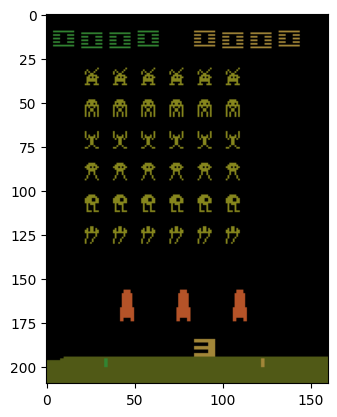

In [12]:
obs = env.reset()
##frame = obs[-1]                # o obs[0], o la que quieras ver
plt.imshow(obs)
plt.show()

In [13]:
def preprocess_observation(obs):
    # Convertir a escala de grises
    gray = cv2.cvtColor(obs, cv2.COLOR_RGB2GRAY)
    # Redimensionar la imagen a (84, 84)
    resized = cv2.resize(gray, (INPUT_SHAPE), interpolation=cv2.INTER_AREA)
    # Normalizar la imagen (opcional)
    normalized = resized / 255.0
    # Añadir una dimensión para el canal
    processed_obs = np.expand_dims(normalized, axis=-1)
    return processed_obs

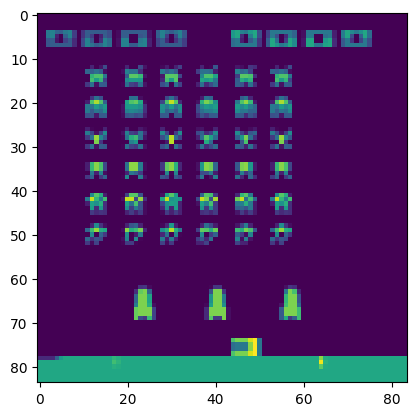

In [14]:
obs = env.reset()               # obs es LazyFrames o lista de 4 arrays (84×84×1)
obs_array = preprocess_observation(obs)       # ahora obs_array.shape == (4,84,84,1)
##frame = obs_array[-1, :, :, 0]  # selecciona el último frame y “aplana” el canal
plt.imshow(obs_array)
plt.show()

1. Implementación de la red neuronal

In [15]:
def create_dqn_model(input_shape, num_actions):

    model = Sequential()

    # Input: 4 stacked grayscale frames, each 84x84
    model.add(InputLayer(input_shape=input_shape))

    #Lo giramos a (H, W, window_length)
    # ahora sí, permuta (frames, H, W) → (H, W, frames)
    model.add(Permute((2, 3, 1)))

    # Convolutional layers basado en DeepMind DQN
    model.add(Conv2D(32, (8, 8), strides=4, activation='relu', name='conv1'))
    model.add(Conv2D(64, (4, 4), strides=2, activation='relu', name='conv2'))
    model.add(Conv2D(64, (3, 3), strides=1, activation='relu', name='conv3'))

    # Flatten and fully connected layers
    model.add(Flatten(name='flatten'))
    model.add(Dense(512, activation='relu', name='dense1'))
    model.add(Dense(num_actions, activation='linear', name='output'))

    # Note: Frames should be normalized (pixel values / 255.0) and stacked before feeding the model.
    return model

In [16]:
input_shape = (WINDOW_LENGTH,) + INPUT_SHAPE
num_actions = nb_actions # 6  Número de acciones posibles en Space Invaders

model = create_dqn_model(input_shape, num_actions)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 permute (Permute)           (None, 84, 84, 4)         0         
                                                                 
 conv1 (Conv2D)              (None, 20, 20, 32)        8224      
                                                                 
 conv2 (Conv2D)              (None, 9, 9, 64)          32832     
                                                                 
 conv3 (Conv2D)              (None, 7, 7, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense1 (Dense)              (None, 512)               1606144   
                                                                 
 output (Dense)              (None, 6)                 3

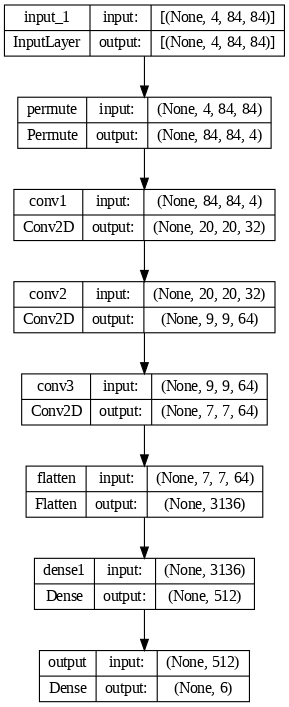

In [18]:
plot_model(model,show_shapes=True, dpi=80)

2. Implementación de la solución DQN

In [19]:
memory = SequentialMemory(limit=1000000, window_length=WINDOW_LENGTH)

In [20]:
processor = AtariProcessor()

In [21]:
policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps', value_max=1.0, value_min=0.1, value_test=0.05, nb_steps=1000000)
# policy = SoftmaxPolicy()
# policy = EpsGreedyQPolicy(eps=0.1)
# policy = GreedyQPolicy()
# policy = BoltzmannQPolicy(tau=1.0)
# policy = MaxBoltzmannQPolicy(eps=0.1, tau=1.0)
# policy = BoltzmannGumbelQPolicy(C=1.0)

In [22]:
dqn = DQNAgent(
    model=model,
    nb_actions=num_actions,
    policy=policy,
    memory=memory,
    processor=processor,
    nb_steps_warmup = 50000,
    gamma=GAMMA,
    target_model_update = TARGET_MODEL_UPDATE,
    train_interval = TRAIN_INTERVAL,
    delta_clip = DELTA_CLIP
)

optimizer = Adam(learning_rate = LEARNING_RATE)
dqn.compile(optimizer=optimizer, metrics=['mae'])

In [23]:
class SaveBestWeights(Callback):
    def __init__(self, filepath, interval=20, overwrite=True):
        super(SaveBestWeights, self).__init__()
        self.filepath = filepath
        self.interval = interval
        self.best_reward = -float('inf')
        self.overwrite = overwrite

    def on_episode_end(self, episode, logs={}):
        if episode % self.interval == 0:
            current_reward = logs.get('episode_reward')
            if current_reward > self.best_reward:
                self.best_reward = current_reward
                #self.model.save_weights(self.filepath)
                #print(f'Pesos guardados en {self.filepath} recompensa: {self.best_reward}')
                if self.overwrite or not os.path.exists(self.filepath):
                    self.model.save_weights(self.filepath, overwrite=True)
                    print(f'Pesos guardados en {self.filepath} recompensa: {self.best_reward}')
                else:
                    print(f'Warning: No se sobrescribió {self.filepath}, ya existe.')

In [24]:
filepath = 'dqn_best_weights.h5'
save_best_weights = SaveBestWeights(filepath=filepath, interval=20, overwrite=True)

In [25]:
class SaveLastWeights(Callback):
    def __init__(self, filepath, interval=10):
        super(SaveLastWeights, self).__init__()
        self.filepath = filepath
        self.interval = interval

    def on_episode_end(self, episode, logs={}):
        if episode % self.interval == 0:
            self.model.save_weights(self.filepath, overwrite=True)
            print(f'Pesos guardados en {self.filepath} al final del episodio {episode}')

In [26]:
filepathlw = 'dqn_last_weights.h5'
save_last_weights = SaveLastWeights(filepath=filepathlw, interval=10)

In [27]:
class MetricsLogger(Callback):
    def __init__(self, filepath):
        self.filepath = filepath
        with open(self.filepath, mode='w') as file:
            writer = csv.writer(file)
            writer.writerow(['episode', 'reward', 'steps'])

    def on_episode_end(self, episode, logs={}):
        reward = logs.get('episode_reward')
        steps = logs.get('nb_episode_steps')

        with open(self.filepath, mode='a') as file:
            writer = csv.writer(file)
            writer.writerow([episode, reward, steps])

In [28]:
metrics_logger = MetricsLogger('training_metrics.csv')

In [29]:
class EarlyStoppingByReward(Callback):
    def __init__(self, reward_threshold, patience):
        super(EarlyStoppingByReward, self).__init__()
        self.reward_threshold = reward_threshold
        self.patience = patience
        self.recent_rewards = deque(maxlen=patience)

    def on_episode_end(self, episode, logs={}):
        current_reward = logs.get('episode_reward')
        self.recent_rewards.append(current_reward)

        if len(self.recent_rewards) == self.patience and all(r > self.reward_threshold for r in self.recent_rewards):
            self.model.stop_training = True
            print(f'Detener el entrenamiento al exceder la recompensa media {self.reward_threshold} en {self.patience} episodios')

In [30]:
early_stopping = EarlyStoppingByReward(reward_threshold=20, patience=10)

In [31]:
log_filename = 'dqn_{}_log.json'.format(env_name)

In [32]:
if os.path.exists(filepathlw):
    print(f'Cargamos los pesos de {filepathlw}')
    dqn.load_weights(filepathlw)
else:
    print('No hay un fichero de pesos, entrenando la red desde cero')

Cargamos los pesos de dqn_last_weights.h5


In [ ]:
#dqn.fit(env, nb_steps=1000000, visualize=False, verbose=2, callbacks=[save_best_weights, early_stopping])
train_scores = dqn.fit(env, nb_steps=5000000, visualize=False, verbose=2, log_interval=10000, callbacks=[save_best_weights, save_last_weights, metrics_logger, early_stopping, FileLogger(log_filename, interval=100)])

Training for 1000000 steps ...
Pesos guardados en dqn_best_weights.h5 recompensa: 9.0
Pesos guardados en dqn_last_weights.h5 al final del episodio 0
    916/1000000: episode: 1, duration: 7.595s, episode steps: 916, steps per second: 121, episode reward:  9.000, mean reward:  0.010 [ 0.000,  1.000], mean action: 2.443 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   1665/1000000: episode: 2, duration: 4.319s, episode steps: 749, steps per second: 173, episode reward:  9.000, mean reward:  0.012 [ 0.000,  1.000], mean action: 2.409 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   2235/1000000: episode: 3, duration: 4.479s, episode steps: 570, steps per second: 127, episode reward:  8.000, mean reward:  0.014 [ 0.000,  1.000], mean action: 2.412 [0.000, 5.000],  loss: --, mae: --, mean_q: --, mean_eps: --
   2615/1000000: episode: 4, duration: 2.217s, episode steps: 380, steps per second: 171, episode reward:  6.000, mean reward:  0.016 [ 0.000,  1.000], mea

/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


  50202/1000000: episode: 72, duration: 15.089s, episode steps: 618, steps per second:  41, episode reward:  7.000, mean reward:  0.011 [ 0.000,  1.000], mean action: 2.612 [0.000, 5.000],  loss: 0.013072, mae: 1.534161, mean_q: 1.868445, mean_eps: 0.954908
  50607/1000000: episode: 73, duration: 23.450s, episode steps: 405, steps per second:  17, episode reward:  6.000, mean reward:  0.015 [ 0.000,  1.000], mean action: 2.494 [0.000, 5.000],  loss: 0.016918, mae: 1.568148, mean_q: 1.905424, mean_eps: 0.954636
  51040/1000000: episode: 74, duration: 24.538s, episode steps: 433, steps per second:  18, episode reward:  4.000, mean reward:  0.009 [ 0.000,  1.000], mean action: 2.420 [0.000, 5.000],  loss: 0.016818, mae: 1.562863, mean_q: 1.900584, mean_eps: 0.954260
  51939/1000000: episode: 75, duration: 50.394s, episode steps: 899, steps per second:  18, episode reward: 15.000, mean reward:  0.017 [ 0.000,  1.000], mean action: 2.496 [0.000, 5.000],  loss: 0.015955, mae: 1.561588, mean_

**Testeo del modelo**

In [33]:
from gym import wrappers
import io
import base64
from IPython.display import HTML

In [34]:
env = wrappers.Monitor(env, "./Videos", force=True) # Para guardar los videos de las partidas
                                                    # necesario instalar ffmpeg

In [35]:
# Testing part to calculate the mean reward
weights_filename = 'dqn_last_weights.h5'
dqn.load_weights(weights_filename)
test_scores = dqn.test(env, nb_episodes=10, visualize=False)

Testing for 10 episodes ...


/usr/local/lib/python3.11/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Episode 1: reward: 8.000, steps: 470
Episode 2: reward: 6.000, steps: 499
Episode 3: reward: 8.000, steps: 869
Episode 4: reward: 6.000, steps: 716
Episode 5: reward: 13.000, steps: 905
Episode 6: reward: 15.000, steps: 1057
Episode 7: reward: 7.000, steps: 651
Episode 8: reward: 6.000, steps: 572
Episode 9: reward: 12.000, steps: 1114
Episode 10: reward: 7.000, steps: 868


In [ ]:
episode_rewards = test_scores.history['episode_reward']
print(int(np.min(episode_rewards)), "~", int(np.max(episode_rewards)), "Mean", np.mean(episode_rewards))

9 ~ 27 Mean 16.9


In [ ]:
video = io.open('./Videos/openaigym.video.%s.video000000.mp4' % env.file_infix, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''
    <video width="360" height="auto" alt="test" controls><source src="data:video/mp4;base64,{0}" type="video/mp4" /></video>'''
.format(encoded.decode('ascii')))

3. Justificación de los parámetros seleccionados y de los resultados obtenidos

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def plot_experiments_json(experiments, fields_to_plot):
    # Colores para los experimentos
    colors = plt.cm.viridis(np.linspace(0, 1, len(experiments)))

    # Leer datos de los archivos json
    data = {}
    for name, path in experiments.items():
        with open(path, 'r') as f:
            data[name] = json.load(f)

    # Convertir los datos a DataFrame
    dfs = {name: pd.DataFrame(experiment_data) for name, experiment_data in data.items()}

    # Configurar subplots en función de la cantidad de campos
    n_fields = len(fields_to_plot)
    if n_fields == 6:
        fig, axs = plt.subplots(3, 2, figsize=(15, 20))
    elif n_fields == 3:
        fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    elif n_fields == 1:
        fig, axs = plt.subplots(1, 1, figsize=(15, 5))
        axs = np.array([axs])  # Convertir a array para la iteración

    fig.subplots_adjust(hspace=0.5, wspace=0.3)

    # Graficar cada campo
    for i, field in enumerate(fields_to_plot):
        ax = axs[i // 2, i % 2] if n_fields == 6 else axs[i]  # Ubicación del subplot
        for (name, df), color in zip(dfs.items(), colors):
            if field in df.columns:
                ax.plot(df[field], label=name, color=color)
        ax.set_xlabel("Timestep")
        ax.set_ylabel(field)
        ax.set_title(field)
        ax.legend()
        ax.grid(True)

    # Ajustar el layout y mostrar la figura
    plt.tight_layout()
    plt.show()

In [ ]:
video = io.open('./Video_procesado_red/video_procesado_red.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''
    <video width="360" height="auto" alt="test" controls><source src="data:video/mp4;base64,{0}" type="video/mp4" /></video>'''
.format(encoded.decode('ascii')))

TRAIN INTERVAL

In [ ]:
#fields_to_plot = ["loss", "mae", "mean_q", "episode_reward", "nb_episode_steps", "duration"]
fields_to_plot = ["loss", "mae", "mean_q"]
experiments = {
    "TRAIN_INTERVAL = 4": "./Experimento_01/dqn_SpaceInvaders-v0_log.json",
    "TRAIN_INTERVAL = 24": "./Experimento_01_A/dqn_SpaceInvaders-v0_log.json",
}
plot_experiments_json(experiments, fields_to_plot)

In [ ]:
fields_to_plot = ["episode_reward", "nb_episode_steps", "duration"]
experiments = {
    "TRAIN_INTERVAL = 4": "./Experimento_01/dqn_SpaceInvaders-v0_log.json",
    "TRAIN_INTERVAL = 24": "./Experimento_01_A/dqn_SpaceInvaders-v0_log.json",
}
plot_experiments_json(experiments, fields_to_plot)

LEARNING RATE

In [ ]:
fields_to_plot = ["loss", "mae", "mean_q"]
experiments = {
    "LR = 0.00001": "./Experimento_06_C/dqn_SpaceInvaders-v0_log.json",
    "LR = 0.00005": "./Experimento_06_C/dqn_SpaceInvaders-v0_log.json",
    "Ex_base LR = 0.00025": "./Experimento_01/dqn_SpaceInvaders-v0_log.json",
    "LR = 0.00050": "./Experimento_02_C/dqn_SpaceInvaders-v0_log.json",
    "LR = 0.00075": "./Experimento_03_C/dqn_SpaceInvaders-v0_log.json",
    "LR = 0.00085": "./Experimento_04_C/dqn_SpaceInvaders-v0_log.json",
    "LR = 0.001": "./Experimento_05_C/dqn_SpaceInvaders-v0_log.json",
}
plot_experiments_json(experiments, fields_to_plot)

In [ ]:
fields_to_plot = ["loss", "mae", "mean_q"]
experiments = {
    "Ex_base LR = 0.00025": "./Experimento_01/dqn_SpaceInvaders-v0_log.json",

    "LR = 0.00001": "./Experimento_08_A/dqn_SpaceInvaders-v0_log.json",
    "LR = 0.00005": "./Experimento_07_A/dqn_SpaceInvaders-v0_log.json",
    "LR = 0.0001": "./Experimento_09_A/dqn_SpaceInvaders-v0_log.json",
    "LR = 0.00025": "./Experimento_01_A/dqn_SpaceInvaders-v0_log.json",
    "LR = .00050": "./Experimento_04_A/dqn_SpaceInvaders-v0_log.json",
    "LR = 0.00075": "./Experimento_05_A/dqn_SpaceInvaders-v0_log.json",
    "LR = 0.00085": "./Experimento_02_A/dqn_SpaceInvaders-v0_log.json",
    "LR = 0.0009": "./Experimento_06_A/dqn_SpaceInvaders-v0_log.json",
    "LR = 0.001": "./Experimento_03_A/dqn_SpaceInvaders-v0_log.json",
}
plot_experiments_json(experiments, fields_to_plot)

In [ ]:
fields_to_plot = ["loss", "mae", "mean_q"]
experiments = {
    "GAMMA = 0.01": "./Experimento_02_B/dqn_SpaceInvaders-v0_log.json",
    "GAMMA = 0.50": "./Experimento_03_B/dqn_SpaceInvaders-v0_log.json",
    "GAMMA = 0.75": "./Experimento_04_B/dqn_SpaceInvaders-v0_log.json",
    "GAMMA = 0.85": "./Experimento_05_B/dqn_SpaceInvaders-v0_log.json",
    "GAMMA = 0.95": "./Experimento_06_B/dqn_SpaceInvaders-v0_log.json",
    "GAMMA = 0.97": "./Experimento_07_B/dqn_SpaceInvaders-v0_log.json",
    "GAMMA = 0.98": "./Experimento_08_B/dqn_SpaceInvaders-v0_log.json",
    "Ex_base GAMMA = 0.99": "./Experimento_01/dqn_SpaceInvaders-v0_log.json",
}
plot_experiments_json(experiments, fields_to_plot)

In [ ]:
fields_to_plot = ["loss", "mae", "mean_q"]
experiments = {
    "Ex_base GAMMA = 0.99": "./Experimento_01/dqn_SpaceInvaders-v0_log.json",
    "GAMMA = 0.01": "./Experimento_10_A/dqn_SpaceInvaders-v0_log.json",
    "GAMMA = 0.50": "./Experimento_11_A/dqn_SpaceInvaders-v0_log.json",
    "GAMMA = 0.75": "./Experimento_12_A/dqn_SpaceInvaders-v0_log.json",
    "GAMMA = 0.95": "./Experimento_13_A/dqn_SpaceInvaders-v0_log.json",
    "GAMMA = 0.97": "./Experimento_14_A/dqn_SpaceInvaders-v0_log.json",
    "GAMMA = 0.98": "./Experimento_15_A/dqn_SpaceInvaders-v0_log.json",
    "GAMMA = 0.99": "./Experimento_01_A/dqn_SpaceInvaders-v0_log.json",

}
plot_experiments_json(experiments, fields_to_plot)

TARGET MODEL UPDATE

In [ ]:
fields_to_plot = ["loss", "mae", "mean_q"]
experiments = {
    "TMU = 10": "./Experimento_04/dqn_SpaceInvaders-v0_log.json",
    "TMU = 100": "./Experimento_03/dqn_SpaceInvaders-v0_log.json",
    "TMU = 1000": "./Experimento_02/dqn_SpaceInvaders-v0_log.json",
    "Ex_base TMU = 10000": "./Experimento_01/dqn_SpaceInvaders-v0_log.json",
    "TMU = 100000": "./Experimento_05/dqn_SpaceInvaders-v0_log.json",
}
plot_experiments_json(experiments, fields_to_plot)

In [ ]:
fields_to_plot = ["loss", "mae", "mean_q"]
experiments = {
    "TMU = 1000": "./Experimento_02/dqn_SpaceInvaders-v0_log.json",
    "Ex_base TMU = 10000": "./Experimento_01/dqn_SpaceInvaders-v0_log.json",
    "TMU = 100000": "./Experimento_05/dqn_SpaceInvaders-v0_log.json",
}
plot_experiments_json(experiments, fields_to_plot)

In [ ]:
fields_to_plot = ["loss", "mae", "mean_q"]
experiments = {
    "Ex_base TMU = 10000": "./Experimento_01/dqn_SpaceInvaders-v0_log.json",
    "TMU = 100": "./Experimento_17_A/dqn_SpaceInvaders-v0_log.json",
    "TMU = 1000": "./Experimento_18_A/dqn_SpaceInvaders-v0_log.json",
    "TMU = 10000": "./Experimento_01_A/dqn_SpaceInvaders-v0_log.json",
    "TMU = 100000": "./Experimento_19_A/dqn_SpaceInvaders-v0_log.json",
}
plot_experiments_json(experiments, fields_to_plot)

INCERTIDUMBRE DE LOS ENTRENAMIENTOS

In [ ]:
fields_to_plot = ["loss", "mae", "mean_q"]
experiments = {
    "Exp_02": "./Exp_02/EXPERIMENTO_02.json",
    "Exp_02 Repetido": "./Exp_02_old/EXPERIMENTO_02.json",
}
plot_experiments_json(experiments, fields_to_plot)

EFECTO DE ENTRENAR MÁS TIEMPO

In [ ]:
fields_to_plot = ["loss", "mae", "mean_q"]
experiments = {
    "Exp_base - 21.4": "./Experimento_base/dqn_SpaceInvaders-v0_log.json",
    "Exp_02 - 20.3": "./Exp_02/EXPERIMENTO_02.json",
    "Exp_03 - 24.6": "./Exp_03/EXPERIMENTO_03.json",
    "Exp_04 - 16.0": "./Exp_04/EXPERIMENTO_04.json",
    "Exp_05 - 21.1": "./Exp_05/EXPERIMENTO_05.json",
    "Exp_06 - 17.0": "./Exp_06/EXPERIMENTO_06.json",
    "Exp_07 - 23.4": "./Exp_07/EXPERIMENTO_07.json",
    "Exp_08 - 14.1": "./Exp_08/EXPERIMENTO_08.json",
}
plot_experiments_json(experiments, fields_to_plot)

---